In [121]:
# Importing libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

# Loding Data

In [2]:
#code source:https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_svmlight_file.html
X, y = load_svmlight_file('diabetes_scale.txt')  # X:input; y:labels

In [3]:
#code source:
# https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
# https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830

#separate data: 60% training data, 20% validation data, 20% testing data
X_train,test_X,y_train,test_y = train_test_split(X, y, test_size=0.2, random_state=1)
#validation set # 0.25 x 0.8 = 0.2
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(f"No. of training examples: {train_X.shape[0]}, No. of training labels: {train_y.shape[0]}")
print(f"No. of validation examples: {val_X.shape[0]}, No. of validation labels: {val_y.shape[0]}")
print(f"No. of testing examples: {test_X.shape[0]}, No. of testing labels: {test_y.shape[0]}")

No. of training examples: 460, No. of training labels: 460
No. of validation examples: 154, No. of validation labels: 154
No. of testing examples: 154, No. of testing labels: 154


In [4]:
#code source: https://stackoverflow.com/questions/26576524/how-do-i-transform-a-scipy-sparse-matrix-to-a-numpy-matrix
print('Original type of X:', type(train_X))
print('Original type of y:', type(train_y))
#change data type
train_X = train_X.toarray()
val_X = val_X.toarray()
test_X = test_X.toarray()
print('New type of X:', type(train_X))
print('New type of y:', type(train_y))

Original type of X: <class 'scipy.sparse.csr.csr_matrix'>
Original type of y: <class 'numpy.ndarray'>
New type of X: <class 'numpy.ndarray'>
New type of y: <class 'numpy.ndarray'>


In [5]:
#add bias in X0
train_X = np.c_[np.ones((train_X.shape[0],1)),train_X]
val_X = np.c_[np.ones((val_X.shape[0],1)),val_X]
test_X = np.c_[np.ones((test_X.shape[0],1)),test_X]

# Code implementation

In [6]:
# code source:
# https://en.wikipedia.org/wiki/Perceptron#Definitions
# https://towardsdatascience.com/perceptron-algorithm-in-python-f3ac89d2e537

In [7]:
def sign(x_i,w):
  """Using sign function to predict result"""
  # Calculating prediction/hypothesis.
  y_pred = np.dot(x_i, w)
  return +1 if (y_pred >0) else -1

In [8]:
def zero_one_loss(x_i, y_i,w):
  """Using zero one loss to calculate loss. 0 for correct prediction, 1 for incorrect prediction."""
  return 1 if y_i*sign(x_i,w) <0 else 0

In [9]:
def update_weight(X,y,w,lr,loss_func):
  """
  X --> Training inputs.
  y --> Training labels/target.
  w --> old weight
  lr --> learning rate
  loss functions --> zero one loss, perceptron loss, hinge loss.
  """
  lst = []
  for j, x_j in enumerate(X):            
      # calculate loss
      if loss_func == 'zero_one_loss':
        loss = zero_one_loss(x_j,y[j],w)
      elif loss_func == 'perceptron_loss':
        loss = perceptron_loss(x_j,y[j],w)
      elif loss_func == 'hinge_loss':
        loss = hinge_loss(x_j,y[j],w)
      else:
        raise "invaild loss function"
      lst.append(y[j]*x_j*loss)
  # calculate summation
  summation = np.sum(lst)   
  # update weights 
  w += lr*summation
  return w

In [10]:
def get_acc_and_loss(X,y,w,loss_func):
  """
  X --> Inputs.
  y --> labels/target.
  w --> weight
  loss functions --> zero one loss, perceptron loss, hinge loss.
  """

  # m-> number of examples
  # n-> number of features 
  m, n = X.shape
  # val accuracy
  y_pred = [] 
  loss_list = []
  for i, x_i in enumerate(X):
    y_hat = sign(x_i, w)
    y_pred.append(y_hat)
    if loss_func == 'zero_one_loss':
        loss = zero_one_loss(x_i,y[i],w)
    elif loss_func == 'perceptron_loss':
        loss = perceptron_loss(x_i,y[i],w)
    elif loss_func == 'hinge_loss':
      loss = hinge_loss(x_i,y[i],w)
    else:
      raise "invalid loss function"
    loss_list.append(loss)
  sum_loss = 1/m*np.sum(loss_list)
  y_pred = np.array(y_pred)
  acc = accuracy_score(y,y_pred)  
  return [acc,sum_loss]

In [111]:
def train_perceptron(train_X, train_y, val_X,val_y, lr, epochs,loss_func):
    """
    training model of perceptron
    train_X --> Training Inputs.
    train_y --> Training labels/target.
    val_X --> Validation Inputs.
    val_y --> Validation labels/target.
    lr --> Learning rate.
    epochs --> Number of Iterations.
    loss_func --> differnent loss function
    """
    # m-> number of training examples
    # n-> number of features 
    m, n = train_X.shape

    np.random.seed(0)

    # Initializing parapeters(w) to random values.
    # +1 in row 0 for the bias term. 
    w = np.vstack((np.ones((1,1)),np.random.randn(8,1)))
    # w= np.zeros((9,1))

    train_acc_list = []
    val_acc_list = []
    train_loss_list = []
    val_loss_list = []

    for epoch in range(epochs):       

      # get train accuracy
        train_acc,train_loss = get_acc_and_loss(train_X,train_y,w,loss_func)
        train_acc_list.append(train_acc)

      # get train loss
        train_loss_list.append(train_loss)
        # print("Train accuracy is {:.2f}%. Train loss is {}".format(train_acc*100,train_loss))

      # get val accuracy
        val_acc, val_loss = get_acc_and_loss(val_X,val_y,w,loss_func)
        val_acc_list.append(val_acc)

      # get val loss
        val_loss_list.append(val_loss)
      # print("Val accuracy is {:.2f}%. Val loss is {}".format(val_acc*100,val_loss))

      # update weight
        w = update_weight(train_X,train_y,w,lr,loss_func)    

    return [w,train_acc_list,val_acc_list,train_loss_list,val_loss_list]

# Training and Testing data :base model

In [12]:
epochs = 20
lr = 1e-4
print('----------base model-------------')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

----------base model-------------
Test accuracy is 59.74%


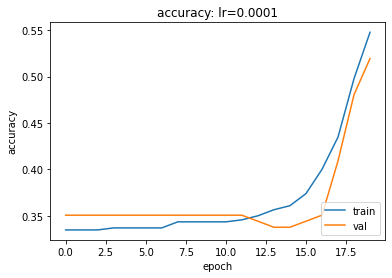

In [13]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr=0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

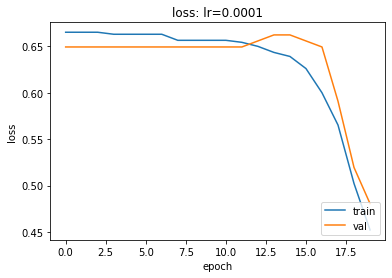

In [14]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr=0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

# Experiments

### 1 trick：change epochs


In [15]:
lr = 1e-4
for epochs in [50,100,150,200]:
  print(f'Epochs={epochs}:')
  model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
  w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
  test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
  print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=50:
Test accuracy is 74.03%
Epochs=100:
Test accuracy is 74.03%
Epochs=150:
Test accuracy is 74.03%
Epochs=200:
Test accuracy is 74.03%


In [16]:
epochs = 50
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=50:
Test accuracy is 74.03%


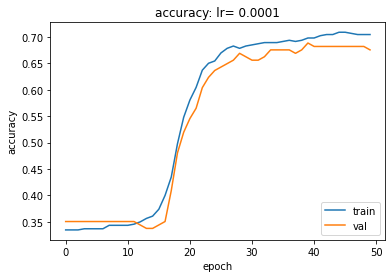

In [17]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

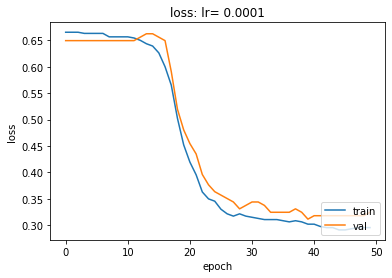

In [18]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [19]:
epochs = 100
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=100:
Test accuracy is 74.03%


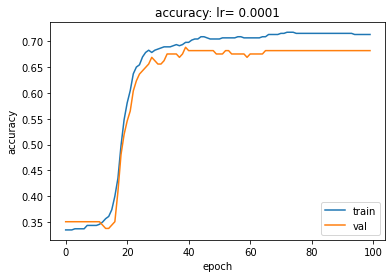

In [20]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

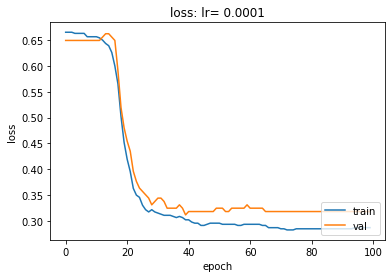

In [21]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [22]:
epochs = 150
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=150:
Test accuracy is 74.03%


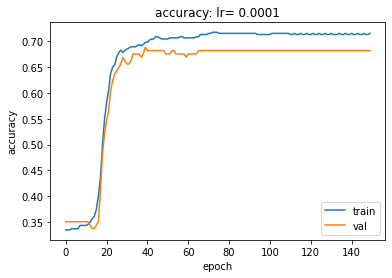

In [23]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

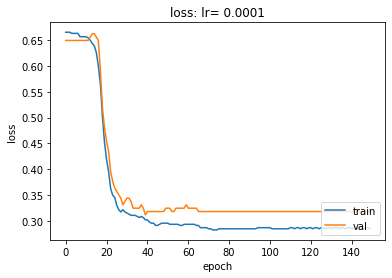

In [24]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [25]:
epochs = 200
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=200:
Test accuracy is 74.03%


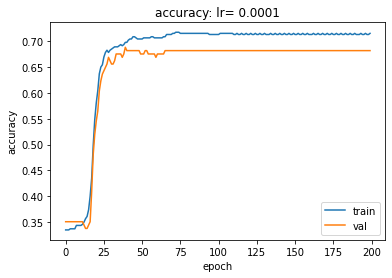

In [26]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

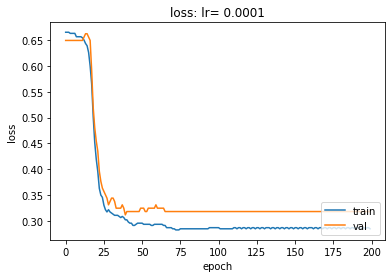

In [27]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

### 2 Tricks: change learning rate + epochs

#### when lr = 0.001

In [28]:
lr = 0.001
for epochs in [20,50,100,150,200]:
  print(f'Epochs={epochs}:')
  model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
  w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
  test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
  print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 74.03%
Epochs=50:
Test accuracy is 74.03%
Epochs=100:
Test accuracy is 74.03%
Epochs=150:
Test accuracy is 74.03%
Epochs=200:
Test accuracy is 74.03%


In [29]:
epochs = 20
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 74.03%


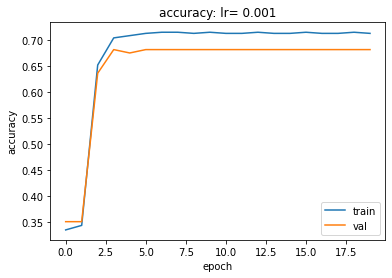

In [30]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

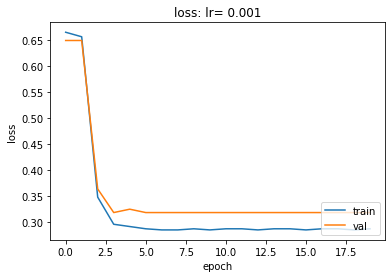

In [31]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [32]:
epochs = 50
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=50:
Test accuracy is 74.03%


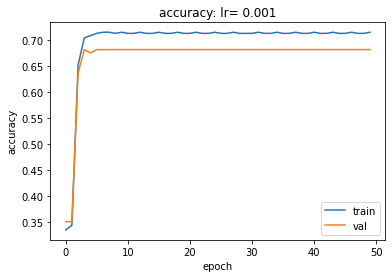

In [33]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

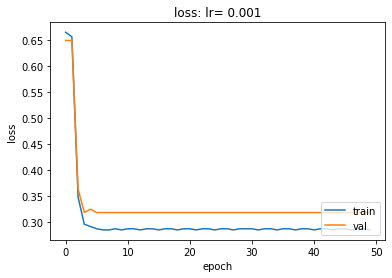

In [34]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [35]:
epochs = 100
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=100:
Test accuracy is 74.03%


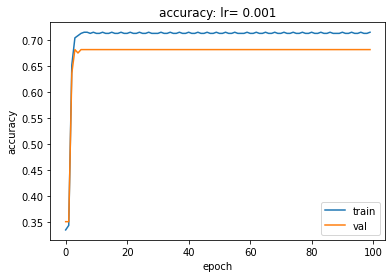

In [36]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

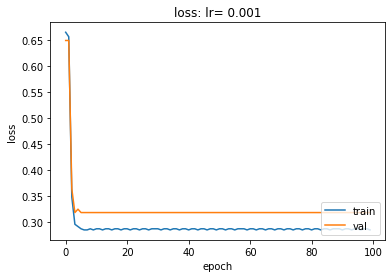

In [37]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [38]:
epochs = 150
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=150:
Test accuracy is 74.03%


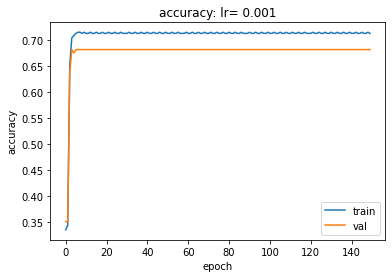

In [39]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

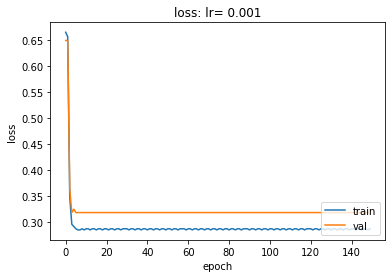

In [40]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [41]:
epochs = 200
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=200:
Test accuracy is 74.03%


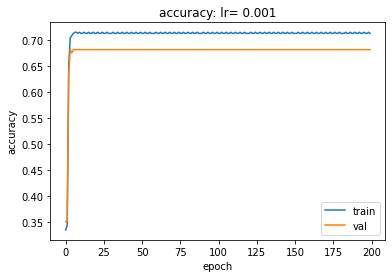

In [42]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

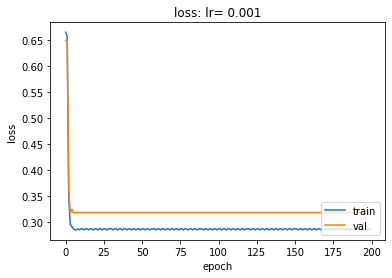

In [43]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

#### when lr= 0.01

In [44]:
lr = 0.01
for epochs in [20,50,100,150,200]:
  print(f'Epochs={epochs}:')
  model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
  w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
  test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
  print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 74.68%
Epochs=50:
Test accuracy is 75.32%
Epochs=100:
Test accuracy is 75.97%
Epochs=150:
Test accuracy is 75.97%
Epochs=200:
Test accuracy is 75.32%


In [45]:
epochs = 20
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 74.68%


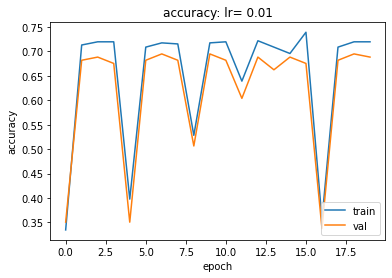

In [46]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

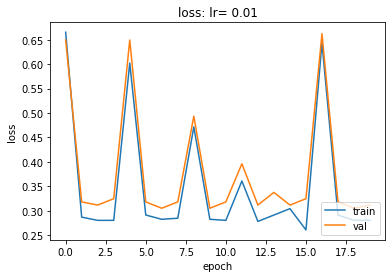

In [47]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [48]:
epochs = 50
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=50:
Test accuracy is 75.32%


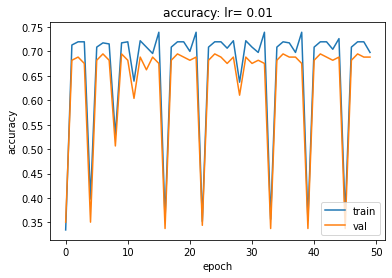

In [49]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

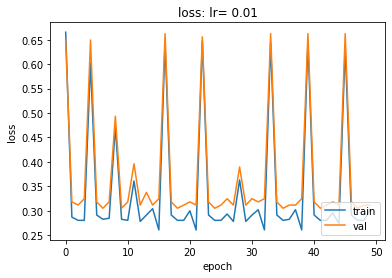

In [50]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [51]:
epochs = 100
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=100:
Test accuracy is 75.97%


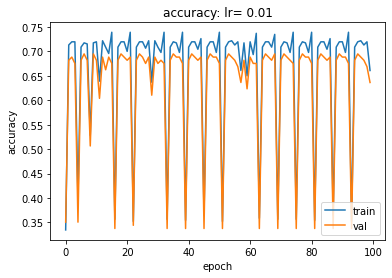

In [52]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

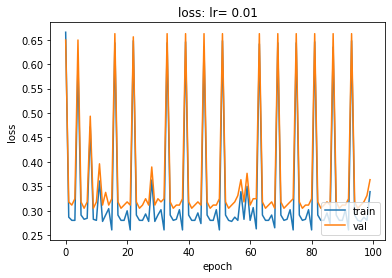

In [53]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [54]:
epochs = 150
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=150:
Test accuracy is 75.97%


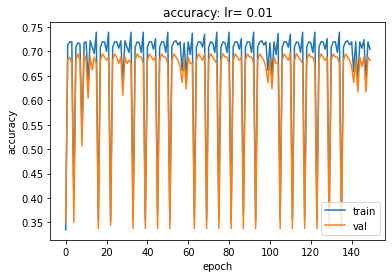

In [55]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

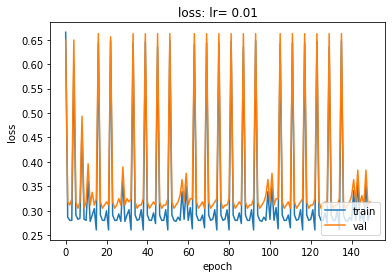

In [56]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [57]:
epochs = 200
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=200:
Test accuracy is 75.32%


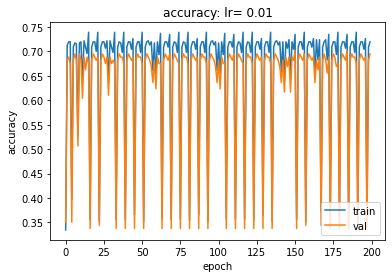

In [58]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.01')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

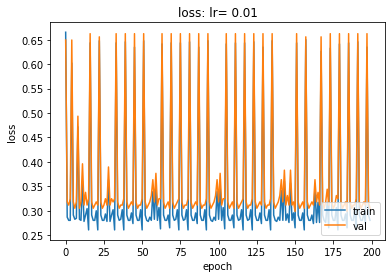

In [59]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

### 3 Tricks: change loss function + learning rate + epochs

#### loss function: zero_one_loss > perceptron loss

In [60]:
def perceptron_loss(x_i,y_i,w):
  """perceptron_loss"""
  loss = -y_i*sign(x_i,w)
  return loss if  loss>0 else 0 

change epoch

In [61]:
lr = 0.001
for epochs in [20,50,100,150,200]:
  print(f'Epochs={epochs}:')
  model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
  w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
  test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
  print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 74.03%
Epochs=50:
Test accuracy is 74.03%
Epochs=100:
Test accuracy is 74.03%
Epochs=150:
Test accuracy is 74.03%
Epochs=200:
Test accuracy is 74.03%


In [62]:
epochs = 20
print(f'Epochs=20:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 74.03%


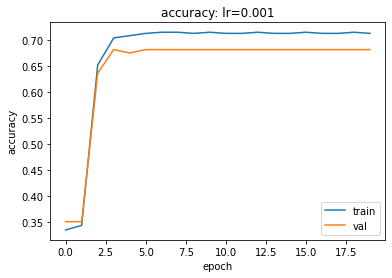

In [63]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr=0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

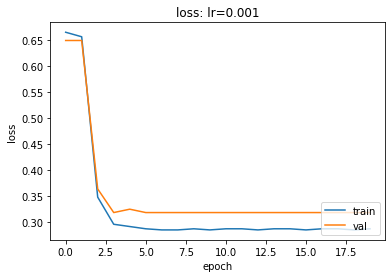

In [64]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr=0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [65]:
epochs = 50
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=50:
Test accuracy is 74.03%


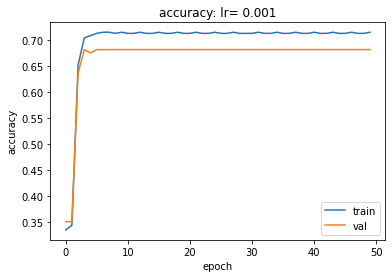

In [66]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

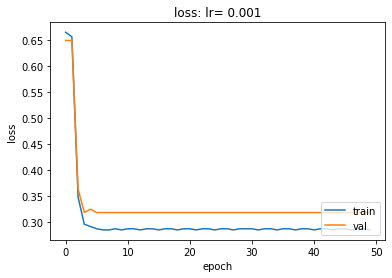

In [67]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [68]:
epochs = 100
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=100:
Test accuracy is 74.03%


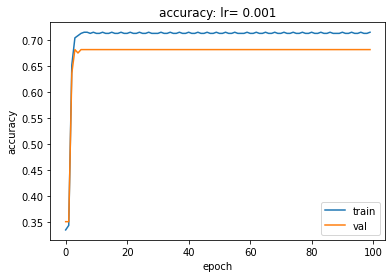

In [69]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

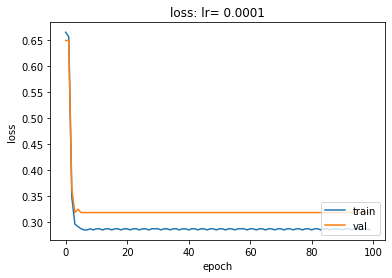

In [70]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [71]:
epochs = 150
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=150:
Test accuracy is 74.03%


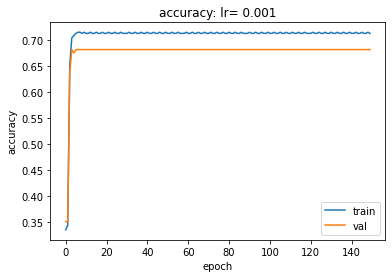

In [72]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

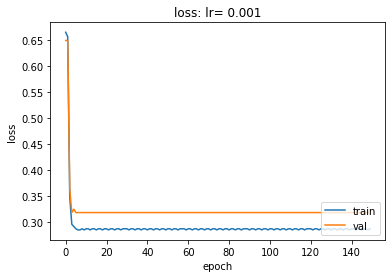

In [73]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [74]:
epochs = 200
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=200:
Test accuracy is 74.03%


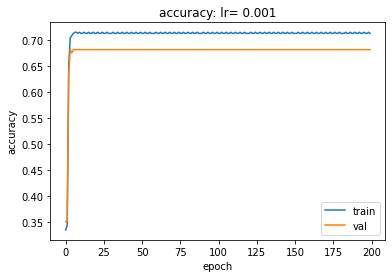

In [75]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

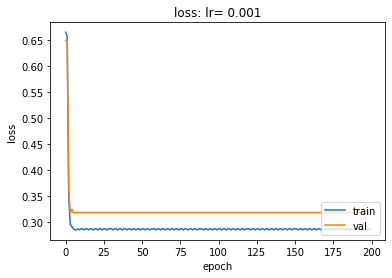

In [76]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

change learning rate

In [77]:
lr = 0.0001
for epochs in [20,50,100,150,200]:
  print(f'Epochs={epochs}:')
  model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
  w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
  test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
  print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 59.74%
Epochs=50:
Test accuracy is 74.03%
Epochs=100:
Test accuracy is 74.03%
Epochs=150:
Test accuracy is 74.03%
Epochs=200:
Test accuracy is 74.03%


In [78]:
epochs = 20
print(f'Epochs=20:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 59.74%


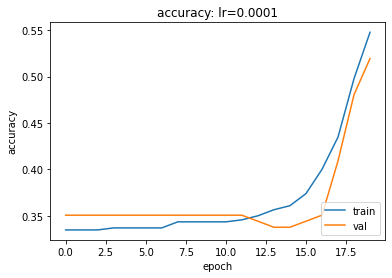

In [79]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr=0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

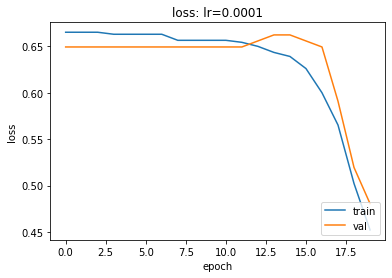

In [80]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr=0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [81]:
epochs = 50
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=50:
Test accuracy is 74.03%


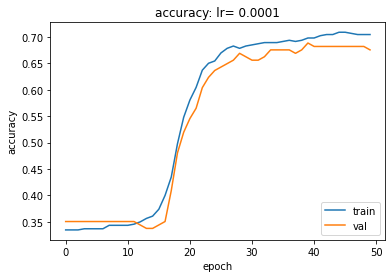

In [82]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

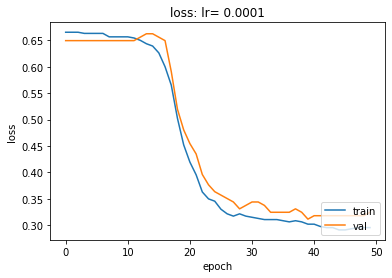

In [83]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [84]:
epochs = 100
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=100:
Test accuracy is 74.03%


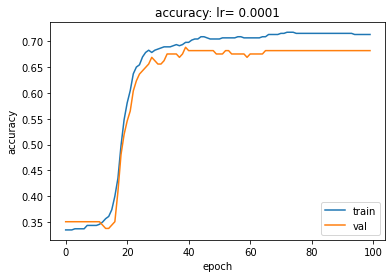

In [85]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

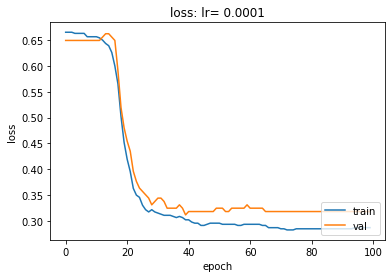

In [86]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [87]:
epochs = 150
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=150:
Test accuracy is 74.03%


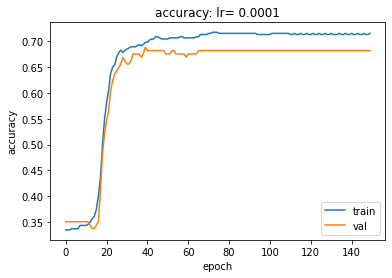

In [88]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

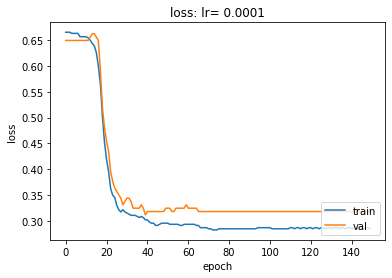

In [89]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

In [90]:
epochs = 200
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'perceptron_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'perceptron_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=200:
Test accuracy is 74.03%


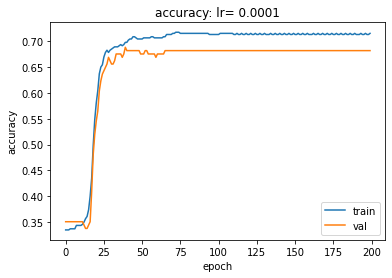

In [91]:
# visualization: accuracy
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr= 0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

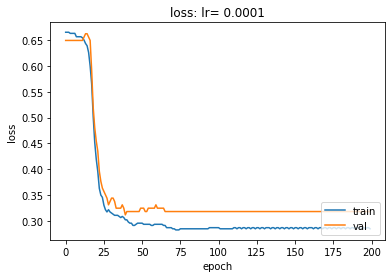

In [92]:
# visualization: loss
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr= 0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

#### loss_func: zero_one_loss > hinge_loss

In [93]:
def hinge_loss(x_i,y_i,w):
  """hinge_loss"""
  loss = 1-y_i*sign(x_i,w)
  return loss if  loss>0 else 0 

change epoch

In [112]:
lr = 0.001
for epochs in [20,50,100,150,200]:
  print(f'Epochs={epochs}:')
  model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'hinge_loss')
  w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
  test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'hinge_loss')
  print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 74.03%
Epochs=50:
Test accuracy is 74.03%
Epochs=100:
Test accuracy is 74.03%
Epochs=150:
Test accuracy is 74.03%
Epochs=200:
Test accuracy is 74.03%


In [113]:
epochs = 10
print(f'Epochs=10:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'hinge_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'hinge_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=10:
Test accuracy is 74.03%


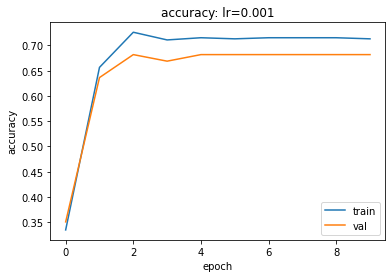

In [114]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr=0.001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

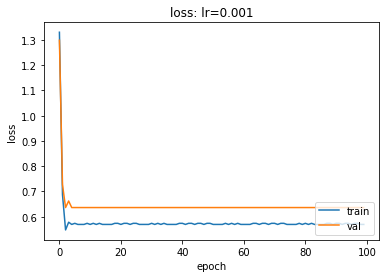

In [97]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr=0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

change learning rate

In [115]:
lr = 0.01
for epochs in [20,50,100,150,200]:
  print(f'Epochs={epochs}:')
  model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'hinge_loss')
  w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
  test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'hinge_loss')
  print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 61.69%
Epochs=50:
Test accuracy is 74.03%
Epochs=100:
Test accuracy is 77.27%
Epochs=150:
Test accuracy is 77.27%
Epochs=200:
Test accuracy is 77.27%


In [116]:
epochs = 100
print(f'Epochs=100:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'hinge_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss = get_acc_and_loss(test_X,test_y,model[0],'hinge_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=100:
Test accuracy is 77.27%


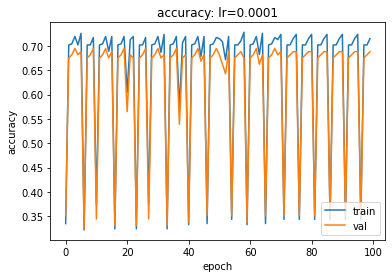

In [117]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)
plt.title('accuracy: lr=0.0001')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

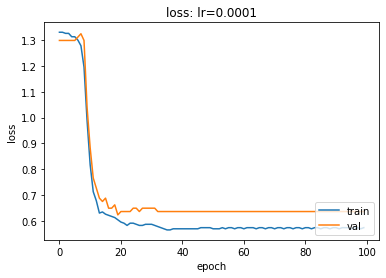

In [101]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.title('loss: lr=0.0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

### Metrics

In [122]:
def get_acc_and_loss2(X,y,w,loss_func):
  """
  X --> Inputs.
  y --> labels/target.
  w --> weight
  loss functions --> zero one loss, perceptron loss, hinge loss.
  """

  # m-> number of examples
  # n-> number of features 
  m, n = X.shape
  # val accuracy
  y_pred = [] 
  loss_list = []
  for i, x_i in enumerate(X):
    y_hat = sign(x_i, w)
    y_pred.append(y_hat)
    if loss_func == 'zero_one_loss':
        loss = zero_one_loss(x_i,y[i],w)
    elif loss_func == 'perceptron_loss':
        loss = perceptron_loss(x_i,y[i],w)
    elif loss_func == 'hinge_loss':
      loss = hinge_loss(x_i,y[i],w)
    else:
      raise "invalid loss function"
    loss_list.append(loss)
  sum_loss = 1/m*np.sum(loss_list)
  y_pred = np.array(y_pred)
  acc = accuracy_score(y,y_pred)  
  return [acc,sum_loss,y_pred]

In [124]:
epochs = 20 
lr= 0.001
print(f'Epochs={epochs}:')
model = train_perceptron(train_X,train_y,val_X,val_y,lr,epochs,'zero_one_loss')
w,train_acc_list,val_acc_list,train_loss_list,val_loss_list = model
test_acc,test_loss,y_pred = get_acc_and_loss2(test_X,test_y,model[0],'zero_one_loss')
print("Test accuracy is {:.2f}%".format(test_acc*100))

Epochs=20:
Test accuracy is 74.03%


In [133]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
(tn, fp, fn, tp)

(43, 12, 28, 71)

In [134]:
from sklearn.metrics import precision_recall_fscore_support
precison, recall, fbeta_score, support = precision_recall_fscore_support(test_y,y_pred,average='binary')
print(precison, recall, fbeta_score, support)


0.8554216867469879 0.7171717171717171 0.7802197802197802 None
